In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = r'D:\Programas\OneDrive - Universidade Federal de Minas Gerais\Data Science\energy_consumption\data\raw\PJME_hourly.csv'
df_raw = pd.read_csv(raw)
df_raw

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


### load_data.py

In [3]:
interim = r'D:\Programas\OneDrive - Universidade Federal de Minas Gerais\Data Science\energy_consumption\data\interim\energy_interim.csv'
df_int = pd.read_csv(interim)
df_int

,Datetime,PJME_MW
0,2002-01-01 01:00:00,30393.0
1,2002-01-01 02:00:00,29265.0
2,2002-01-01 03:00:00,28357.0
3,2002-01-01 04:00:00,27899.0
4,2002-01-01 05:00:00,28057.0
...,...,...
145361,2018-08-02 20:00:00,44057.0
145362,2018-08-02 21:00:00,43256.0
145363,2018-08-02 22:00:00,41552.0
145364,2018-08-02 23:00:00,38500.0


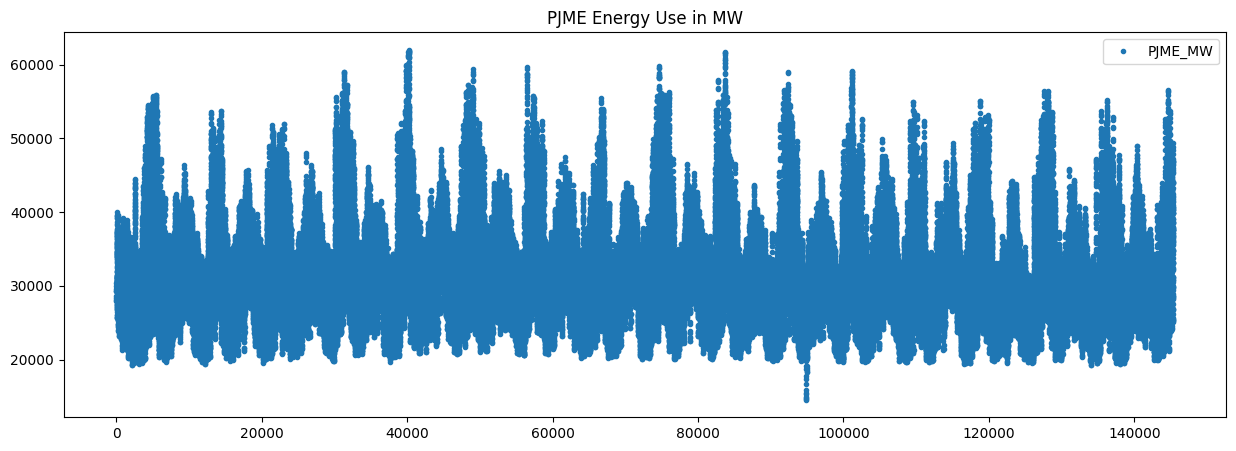

In [8]:
df_int.plot(style='.',
        figsize=(15, 5),
        # color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

<Axes: ylabel='Frequency'>

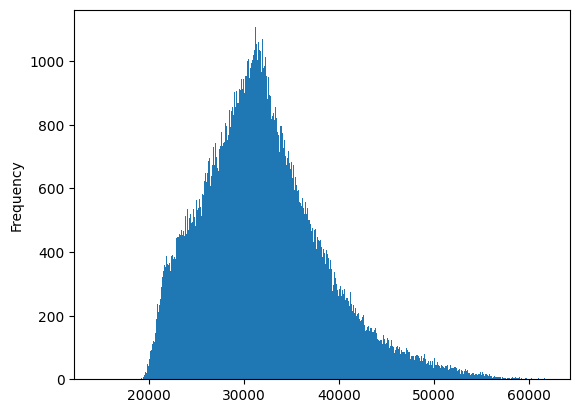

In [11]:
df_int['PJME_MW'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}>

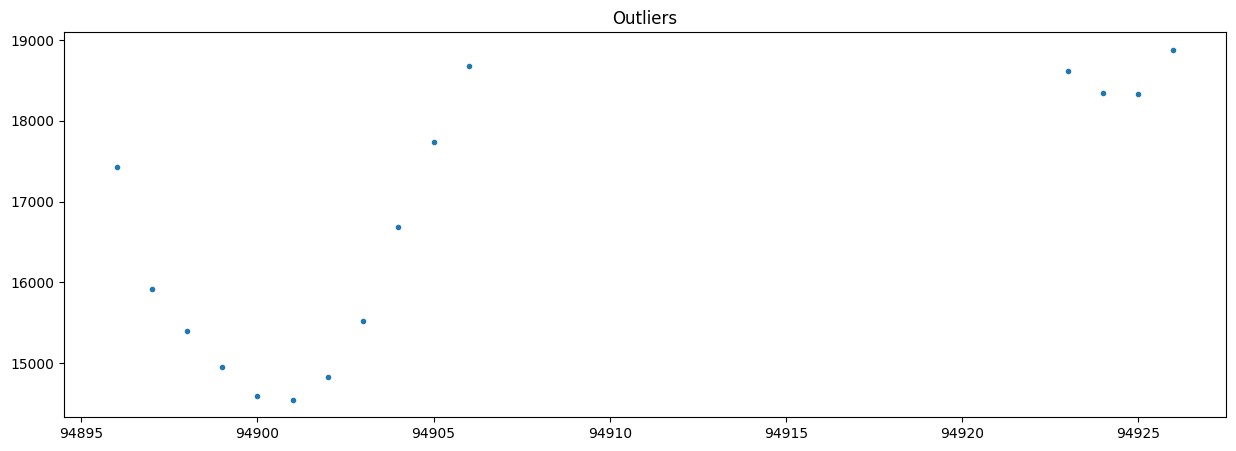

In [17]:
df_int.query('PJME_MW < 19_000')['PJME_MW'] \
    .plot(style='.',
          figsize=(15, 5),
        #   color=color_pal[5],
          title='Outliers')

<Axes: title={'center': 'Outliers'}>

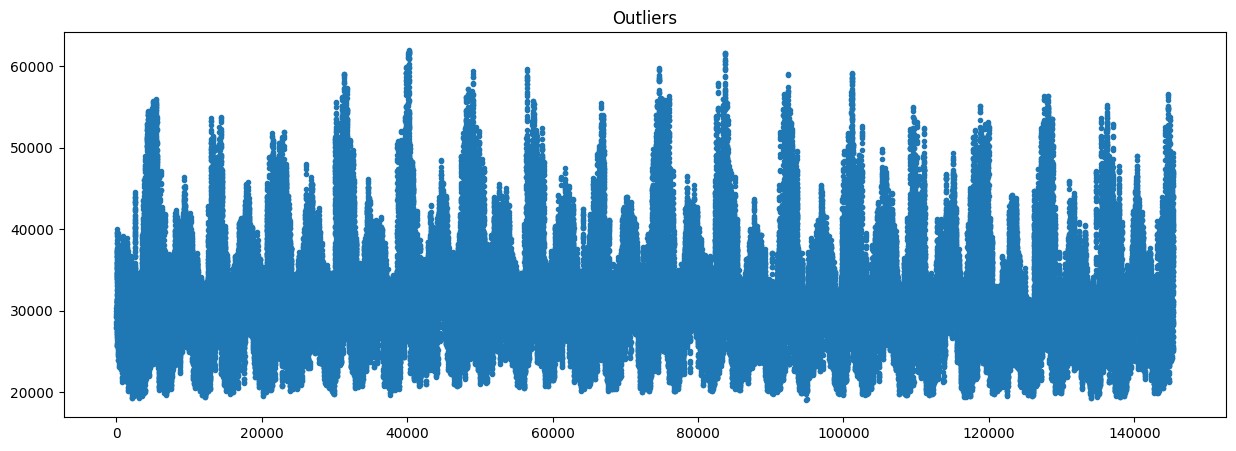

In [18]:
df_int.query('PJME_MW > 19_000')['PJME_MW'] \
    .plot(style='.',
          figsize=(15, 5),
        #   color=color_pal[5],
          title='Outliers')

### make_features.py

In [19]:
features = r'D:\Programas\OneDrive - Universidade Federal de Minas Gerais\Data Science\energy_consumption\data\processed\energy_features.csv'
df_feat = pd.read_csv(features)
df_feat

,Datetime,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag_364d,lag_728d,lag_1092d
0,2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,1,1,NaN,NaN,NaN
1,2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,1,1,NaN,NaN,NaN
2,2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,1,1,NaN,NaN,NaN
3,2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,1,1,NaN,NaN,NaN
4,2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145346,2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,2,31,42256.0,41485.0,38804.0
145347,2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,2,31,41210.0,40249.0,38748.0
145348,2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,2,31,39525.0,38698.0,37330.0
145349,2018-08-02 23:00:00,38500.0,23,3,3,8,2018,214,2,31,36490.0,35406.0,34552.0


In [22]:
train = df_feat.loc[df_feat.index < '01-01-2015']
test = df_feat.loc[df_feat.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str